# Fitting a vine copula on dataset and sampling from the model

## Import the required libraries

In [1]:
import numpy as np
import pyvinecopulib as pv

# Simulate some data

In [2]:
np.random.seed(1234)  # seed for the random generator
n = 1000  # number of observations
d = 5  # the dimension
mean = 1 + np.random.normal(size=d)  # mean vector
cov = np.random.normal(size=(d, d))  # covariance matrix
cov = np.dot(cov.transpose(), cov)  # make it non-negative definite
x = np.random.multivariate_normal(mean, cov, n)

## Fit a model

(<Figure size 1400x1400 with 25 Axes>,
 array([[<Axes: ylabel='var1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='var2 (z)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='var3 (z)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='var4 (z)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='var1 (z)', ylabel='var5 (z)'>,
         <Axes: xlabel='var2 (z)'>, <Axes: xlabel='var3 (z)'>,
         <Axes: xlabel='var4 (z)'>, <Axes: xlabel='var5'>]], dtype=object))

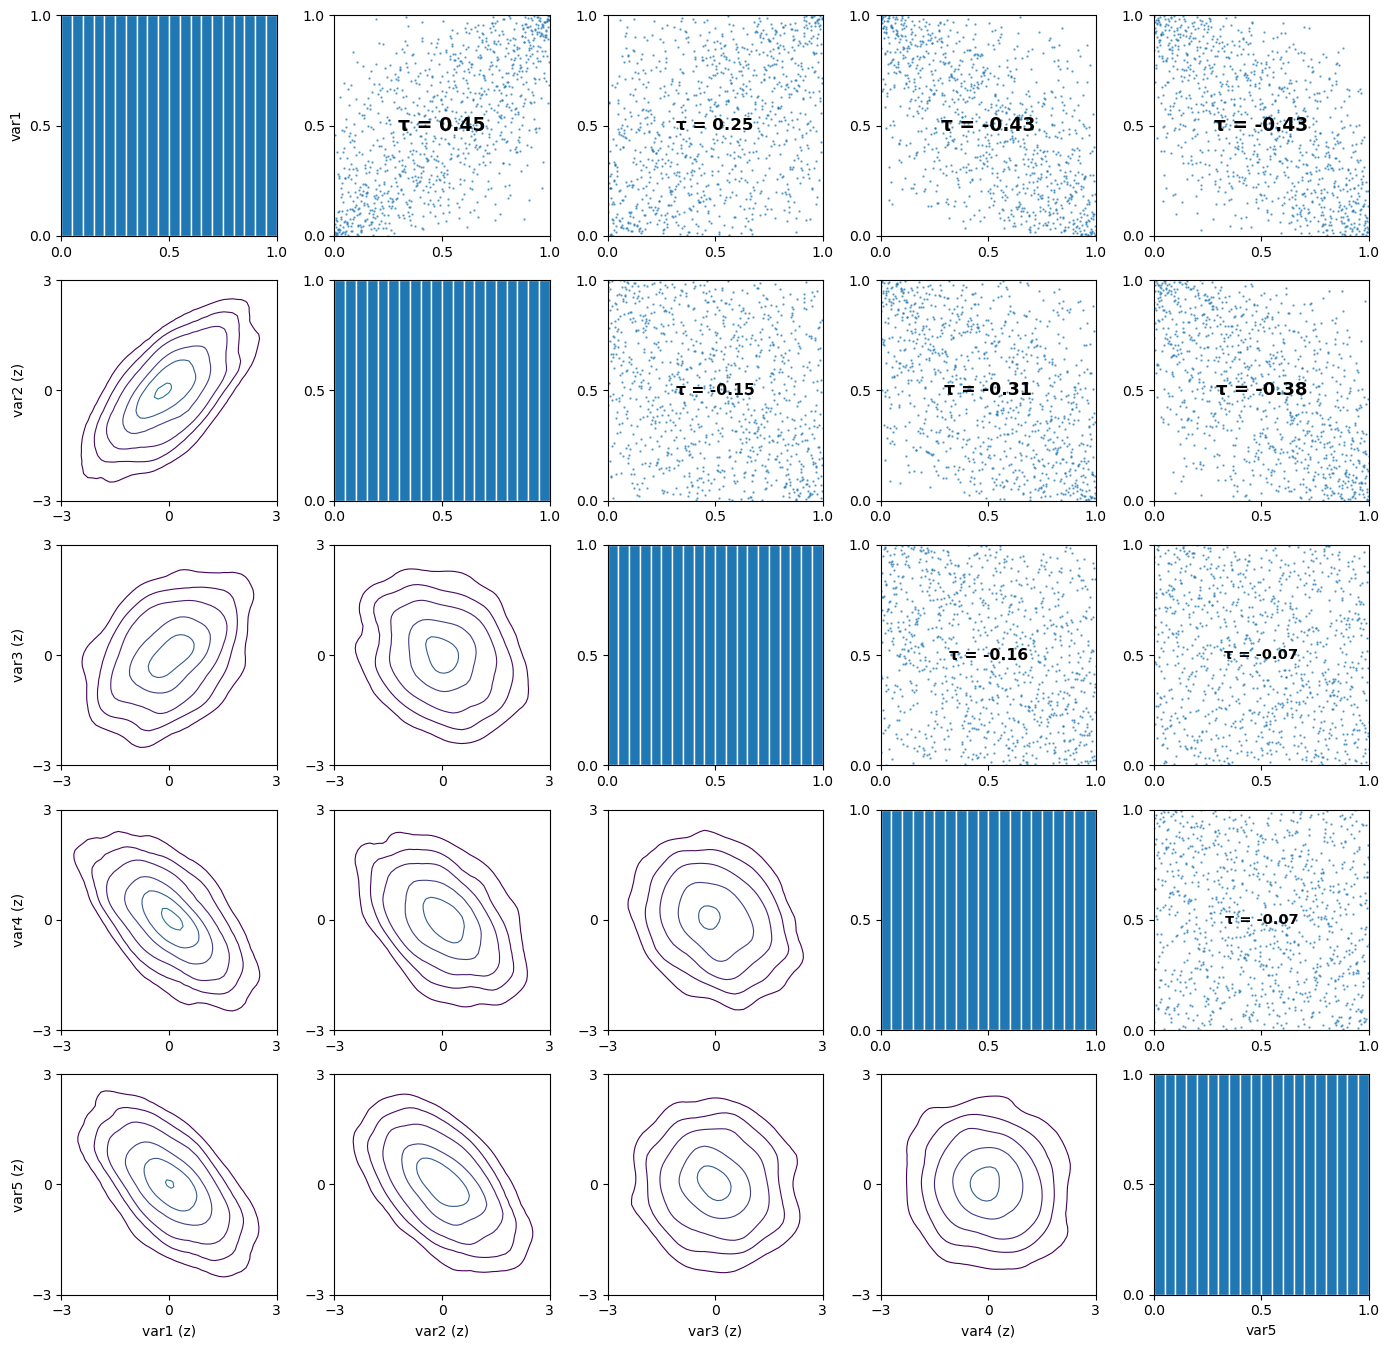

In [3]:
# Transform copula data using the empirical distribution
u = pv.to_pseudo_obs(x)
# Visualize the pair-copula data
pv.pairs_copula_data(u, scatter_size=0.5)

In [4]:
# Fit a Gaussian vine
# (i.e., properly specified since the data is multivariate normal)
controls = pv.FitControlsVinecop(family_set=[pv.gaussian])
cop = pv.Vinecop.from_data(u, controls=controls)
print(cop)

<pyvinecopulib.Vinecop> Vinecop model with 5 variables
tree edge conditioned variables conditioning variables var_types   family rotation parameters  df   tau 
   1    1                  3, 1                             c, c Gaussian        0       0.39 1.0  0.26 
   1    2                  2, 1                             c, c Gaussian        0       0.66 1.0  0.46 
   1    3                  4, 1                             c, c Gaussian        0      -0.63 1.0 -0.43 
   1    4                  1, 5                             c, c Gaussian        0      -0.62 1.0 -0.43 
   2    1                  3, 2                      1      c, c Gaussian        0      -0.71 1.0 -0.50 
   2    2                  2, 5                      1      c, c Gaussian        0      -0.25 1.0 -0.16 
   2    3                  4, 5                      1      c, c Gaussian        0      -0.80 1.0 -0.59 
   3    1                  3, 5                   2, 1      c, c Gaussian        0       0.00 1.0  0.00 


## Sample from the model

(<Figure size 1400x1400 with 25 Axes>,
 array([[<Axes: ylabel='var1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='var2 (z)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='var3 (z)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='var4 (z)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='var1 (z)', ylabel='var5 (z)'>,
         <Axes: xlabel='var2 (z)'>, <Axes: xlabel='var3 (z)'>,
         <Axes: xlabel='var4 (z)'>, <Axes: xlabel='var5'>]], dtype=object))

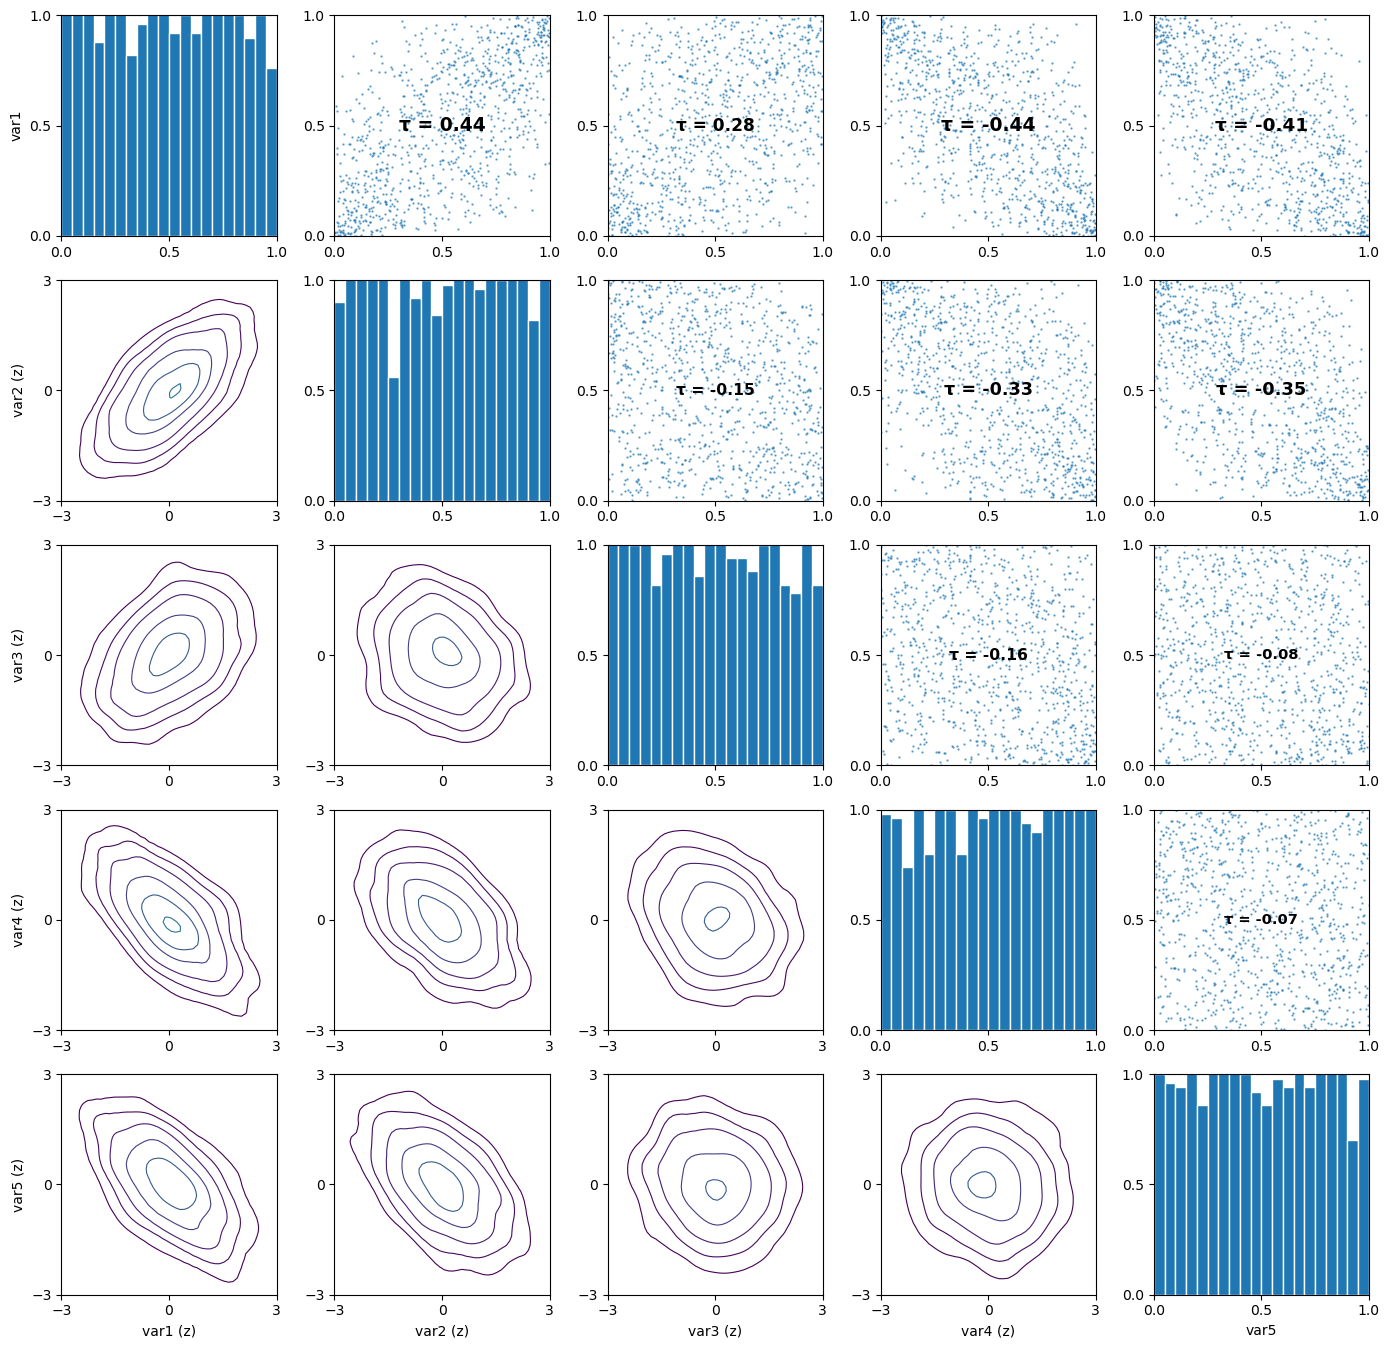

In [5]:
# Sample from the copula
n_sim = 1000
u_sim = cop.simulate(n_sim, seeds=[1, 2, 3, 4])
# Visualize the simulated pair-copula data
pv.pairs_copula_data(u_sim, scatter_size=0.5)

In [6]:
# Transform back simulations to the original scale
x_sim = np.asarray([np.quantile(x[:, i], u_sim[:, i]) for i in range(0, d)])

# Both the mean and covariance matrix look ok!
[mean, np.mean(x_sim, 1)]
[cov, np.cov(x_sim)]

[array([[ 2.37095772,  1.72011592,  1.34581349, -2.33400987, -3.1412032 ],
        [ 1.72011592,  2.77391072, -0.8386675 , -1.94255384, -3.0356469 ],
        [ 1.34581349, -0.8386675 ,  4.73656299, -1.11520579, -1.00737741],
        [-2.33400987, -1.94255384, -1.11520579,  6.17099976, -0.86804342],
        [-3.1412032 , -3.0356469 , -1.00737741, -0.86804342, 10.39309954]]),
 array([[ 2.16744222,  1.47141143,  1.34279539, -2.30665541, -2.69624644],
        [ 1.47141143,  2.53813925, -0.86535813, -1.89449628, -2.53984006],
        [ 1.34279539, -0.86535813,  4.78148082, -1.28555668, -0.81042926],
        [-2.30665541, -1.89449628, -1.28555668,  5.90766463, -0.69632775],
        [-2.69624644, -2.53984006, -0.81042926, -0.69632775,  9.23475236]])]